In [1]:
 # need notebook backend for interaction
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt

# file-handling stuff for user, options abound! I like Tables and Pandas DataFrames
import pandas as pd
from astropy.table import Table
from astropy import units as u

# import kosmos... if we do it right this should be the only other thing to import someday!
import sys  
sys.path.append('/Users/james/Dropbox/research_projects/kosmos/')

import kosmos
kosmos.__version__

Importing the dtw module. When using in academic works please cite:
  T. Giorgino. Computing and Visualizing Dynamic Time Warping Alignments in R: The dtw Package.
  J. Stat. Soft., doi:10.18637/jss.v031.i07.



'0.03'

In [2]:
biasfiles_i = pd.read_table('biaslist.txt', names=['impath'])
biasfiles =  biasfiles_i['impath'].values

bias = kosmos.biascombine(biasfiles)

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa.
 [astropy.io.fits.verify]

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa.
a floating-point value was expected. [astropy.wcs.wcs]
a floating-point value was expected.
a floating-point value was expected. [astropy.wcs.wcs]
a floating-point value was expected.
a floating-point value was expected. [astropy.wcs.wcs]
a floating-point value was expected.
a floating-point value was expected. [astropy.wcs.wcs]
a floating-point value was expected.


In [3]:
red_center_files = ['int_neon_gd71.0004.fits','int_neon_qyaur.0002.fits',
                    'int_neon_yygem.0001.fits','int_neon_bd28_4211.0001.fits',
                    'truss_neon_gd71.0005.fits','truss_neon_bd28_4211.0001.fits']

In [4]:
bias.shape

(4096, 2148)

In [5]:
trace = np.ones(bias.shape[0]) + 600


In [6]:
Fout = np.zeros((len(red_center_files), bias.shape[0]))
TELROT = np.zeros(len(red_center_files))
for k in range(len(red_center_files)):
    img_k = kosmos.proc(red_center_files[k], bias=bias, trim=False, Waxis=0)
    ex_k, _ = kosmos.BoxcarExtract(img_k, trace, apwidth=3, Waxis=0)
    TELROT[k] = img_k.header['TELROT']
    Fout[k,:] =  ex_k.flux.value/np.nanmean(ex_k.flux)


/Users/james/Dropbox/research_projects/kosmos/kosmos/apextract.py:340: RuntimeWarning: invalid value encountered in sqrt
  fluxerr[i] = np.sqrt(np.nansum((onedspec[i]-skysubflux[i])) +


<IPython.core.display.Javascript object>


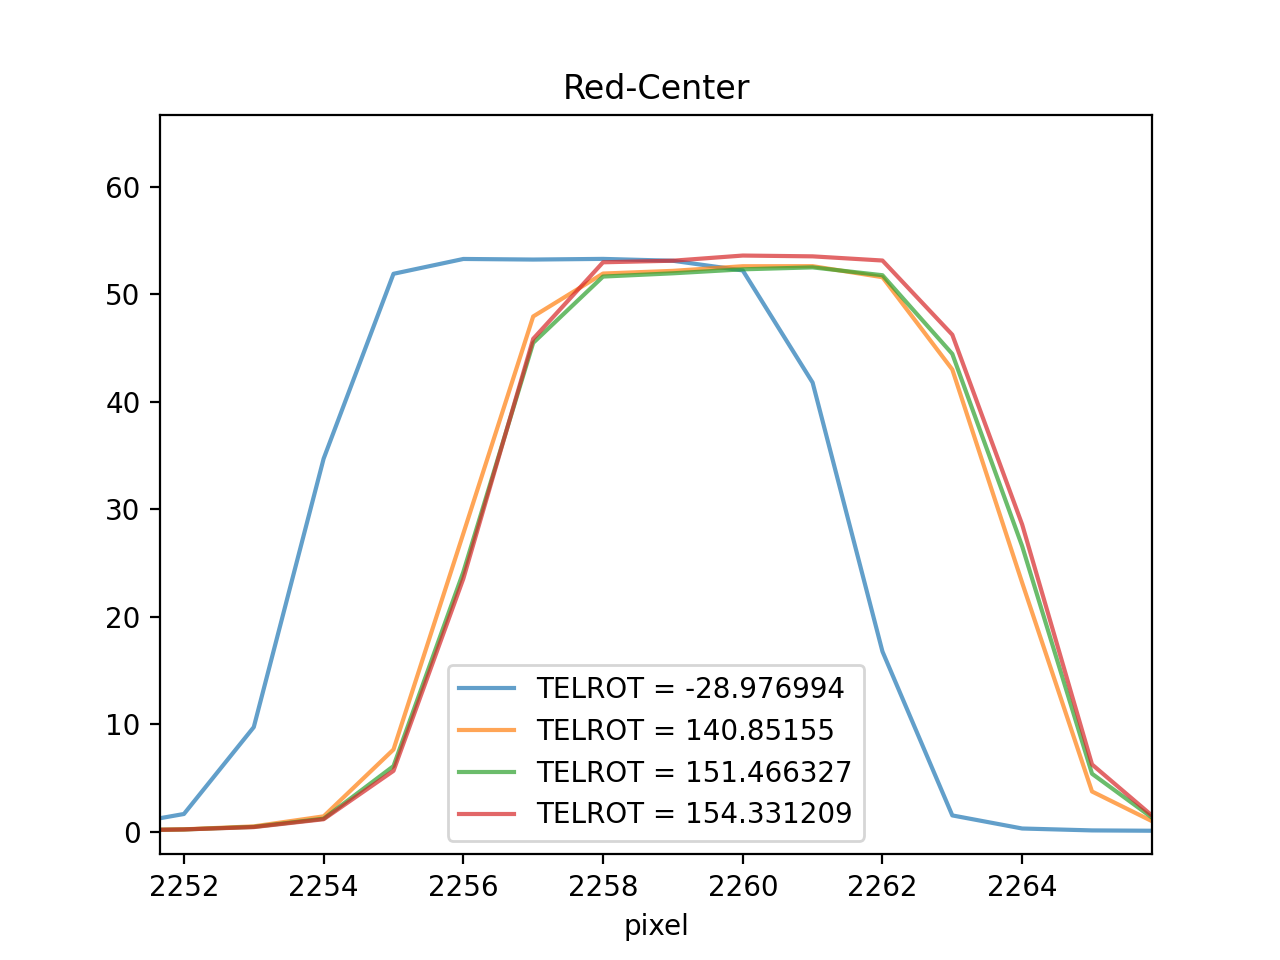

Text(0.5, 1.0, 'Red-Center')

In [11]:
# plt.figure(figsize=(9,4))
ss = np.argsort(TELROT[0:4])
for k in range(0,4):
#     plt.plot(Fout[k,:], label=red_center_files[k], alpha=0.5)
    plt.plot(Fout[ss[k],:], label=('TELROT = '+str(TELROT[ss[k]])), alpha=0.7)
    
plt.legend(fontsize=10)
plt.xlabel('pixel')
plt.title('Red-Center')


<IPython.core.display.Javascript object>


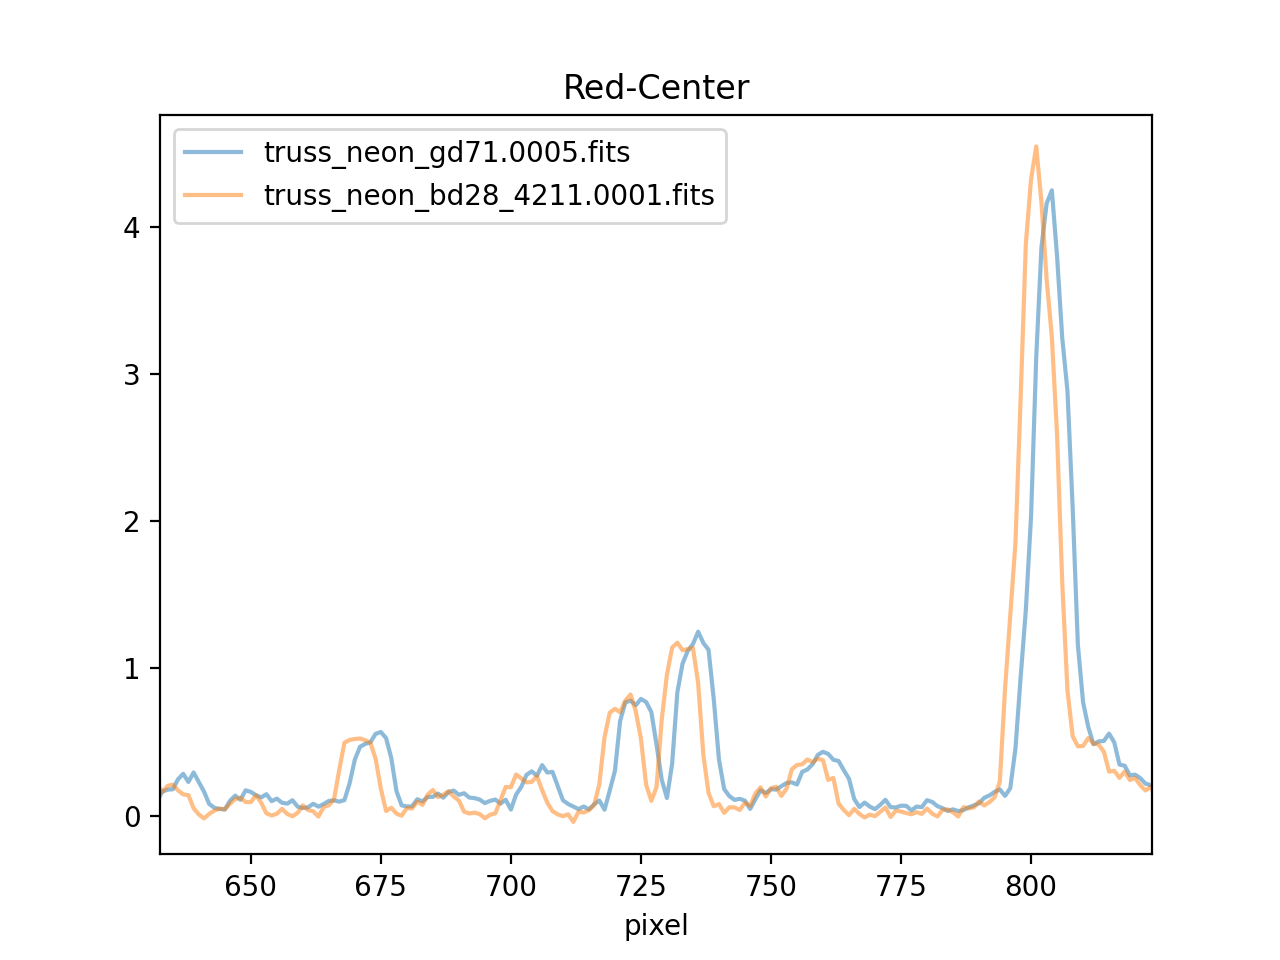

Text(0.5, 1.0, 'Red-Center')

In [25]:
# plt.figure(figsize=(9,4))
for k in [4,5]:
    plt.plot(Fout[k,:], label=red_center_files[k], alpha=0.5)
    
plt.legend(fontsize=10)
plt.xlabel('pixel')
plt.title('Red-Center')


<IPython.core.display.Javascript object>


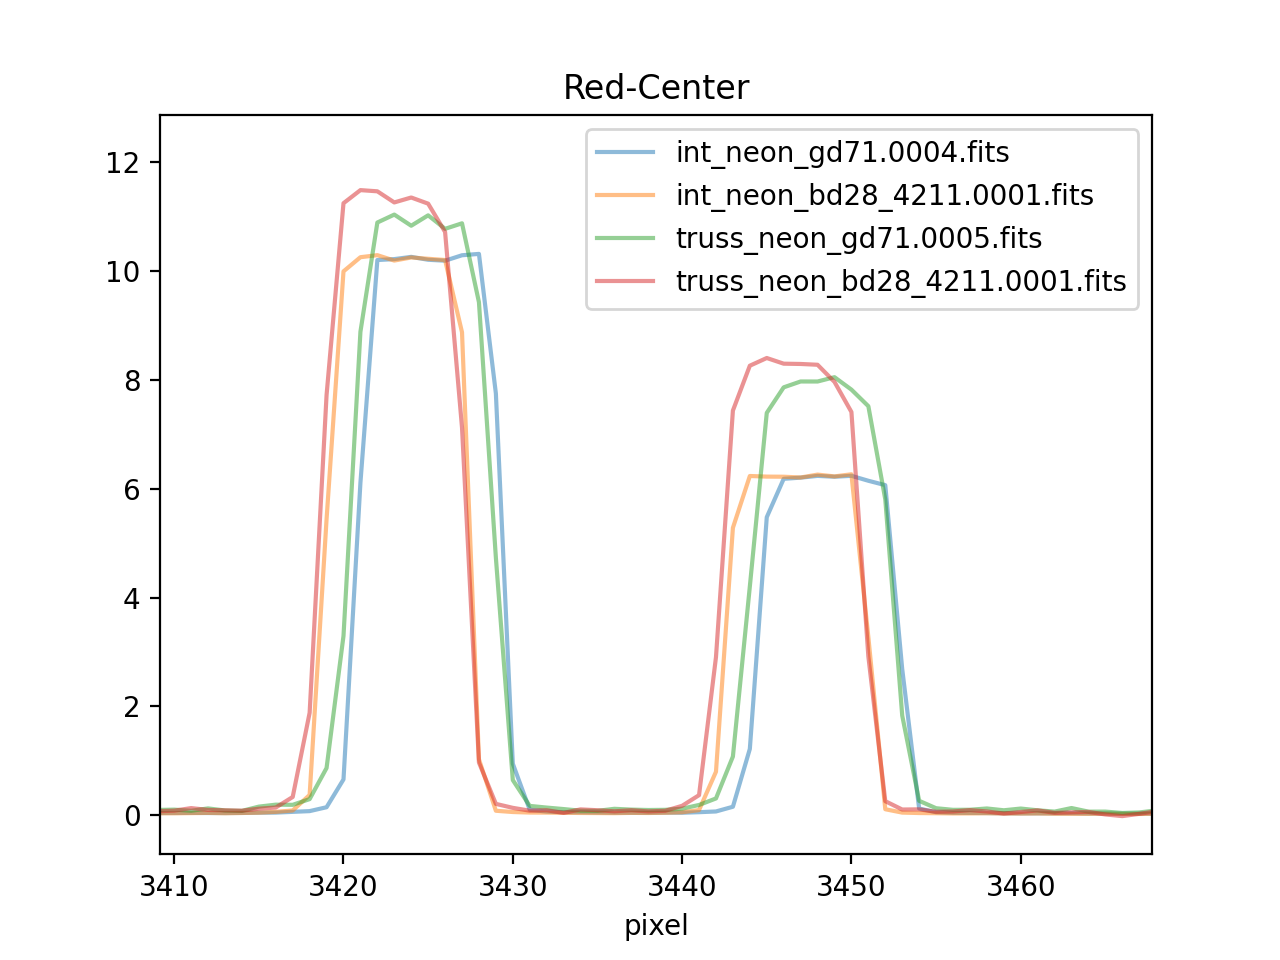

Text(0.5, 1.0, 'Red-Center')

In [29]:
# plt.figure(figsize=(9,4))
for k in [0,3,4,5]:
    plt.plot(Fout[k,:], label=red_center_files[k], alpha=0.5)
    
plt.legend(fontsize=10)
plt.xlabel('pixel')
plt.title('Red-Center')
